In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("./penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
label_encoder_island=LabelEncoder()

In [5]:
data["island_numeric"]=label_encoder_island.fit_transform(data["island"])
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,2
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


In [6]:
label_encoder_island.inverse_transform([0])

array(['Biscoe'], dtype=object)

In [7]:
def analisi_grafica(data_frame, target_name, lista_variabili_quantitative):
    '''
        la funzione analisi_grafica crea un'analisi grafica delle colonne quantitative di un dataframe:

        crea n*n grafici dove n è uguale alla lunghezza di "lista_variabili_quantitative". I grafici che genera sono:
        - istogrammi quando si tratta  della stessa variabile
        - grafici a dispersione quando si tratta di variabili diverse

        INPUT:
        -data_frame: data frame letto con pandas
        -target_name: nome della colonna dataframe su cui effetturare il riconoscimeto
        -lista_variabili_quantitative: lista contente i nomi delle colonne quantitative del dataframe
        
        RETURN:
        -analisi grafica del dataframe: figura contenente grafici a 
        dispersione e istogrammi delle varibili quantitative con colori 
        diversi in base al valore del target
        
        '''
    
    unique_target_values=data_frame[target_name].unique()
    target_values_color={}
    nrows, ncols=len(lista_variabili_quantitative), len(lista_variabili_quantitative)
    for value in unique_target_values:
        target_values_color[value]=np.random.uniform(0, 1,3)
    fig, axs=plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*nrows, ncols*ncols))
    for i in range(nrows):
        for j in range(ncols):
            if i==j:
                for value in unique_target_values:
                    axs[i, j].hist(data_frame[data_frame[target_name]==value][lista_variabili_quantitative[i]].values, color=target_values_color[value],  label=value, alpha=0.5)


                    axs[i, j].set_xlabel(lista_variabili_quantitative[i])
                    axs[i, j].set_ylabel("Frequenza")
                    axs[i, j].legend()


            else:
                for value in unique_target_values:
                    axs[i, j].scatter(data_frame[data_frame[target_name]==value][lista_variabili_quantitative[i]].values, data_frame[data_frame[target_name]==value][lista_variabili_quantitative[j]].values,   color=target_values_color[value],  alpha=0.5, label=value)


                axs[i, j].set_xlabel(lista_variabili_quantitative[i])
                axs[i, j].set_ylabel(lista_variabili_quantitative[j])
                axs[i, j].legend()

            
                

                
    
    plt.show()
        

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
 7   island_numeric     344 non-null    int32  
dtypes: float64(4), int32(1), object(3)
memory usage: 20.3+ KB


In [15]:
nuovo_data=data[["species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]].copy()#IMPORTANTE
nuovo_data.dropna(inplace=True)
nuovo_data["island_numeric"]=label_encoder_island.fit_transform(nuovo_data["island"])

nuovo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   island_numeric     342 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 20.0+ KB


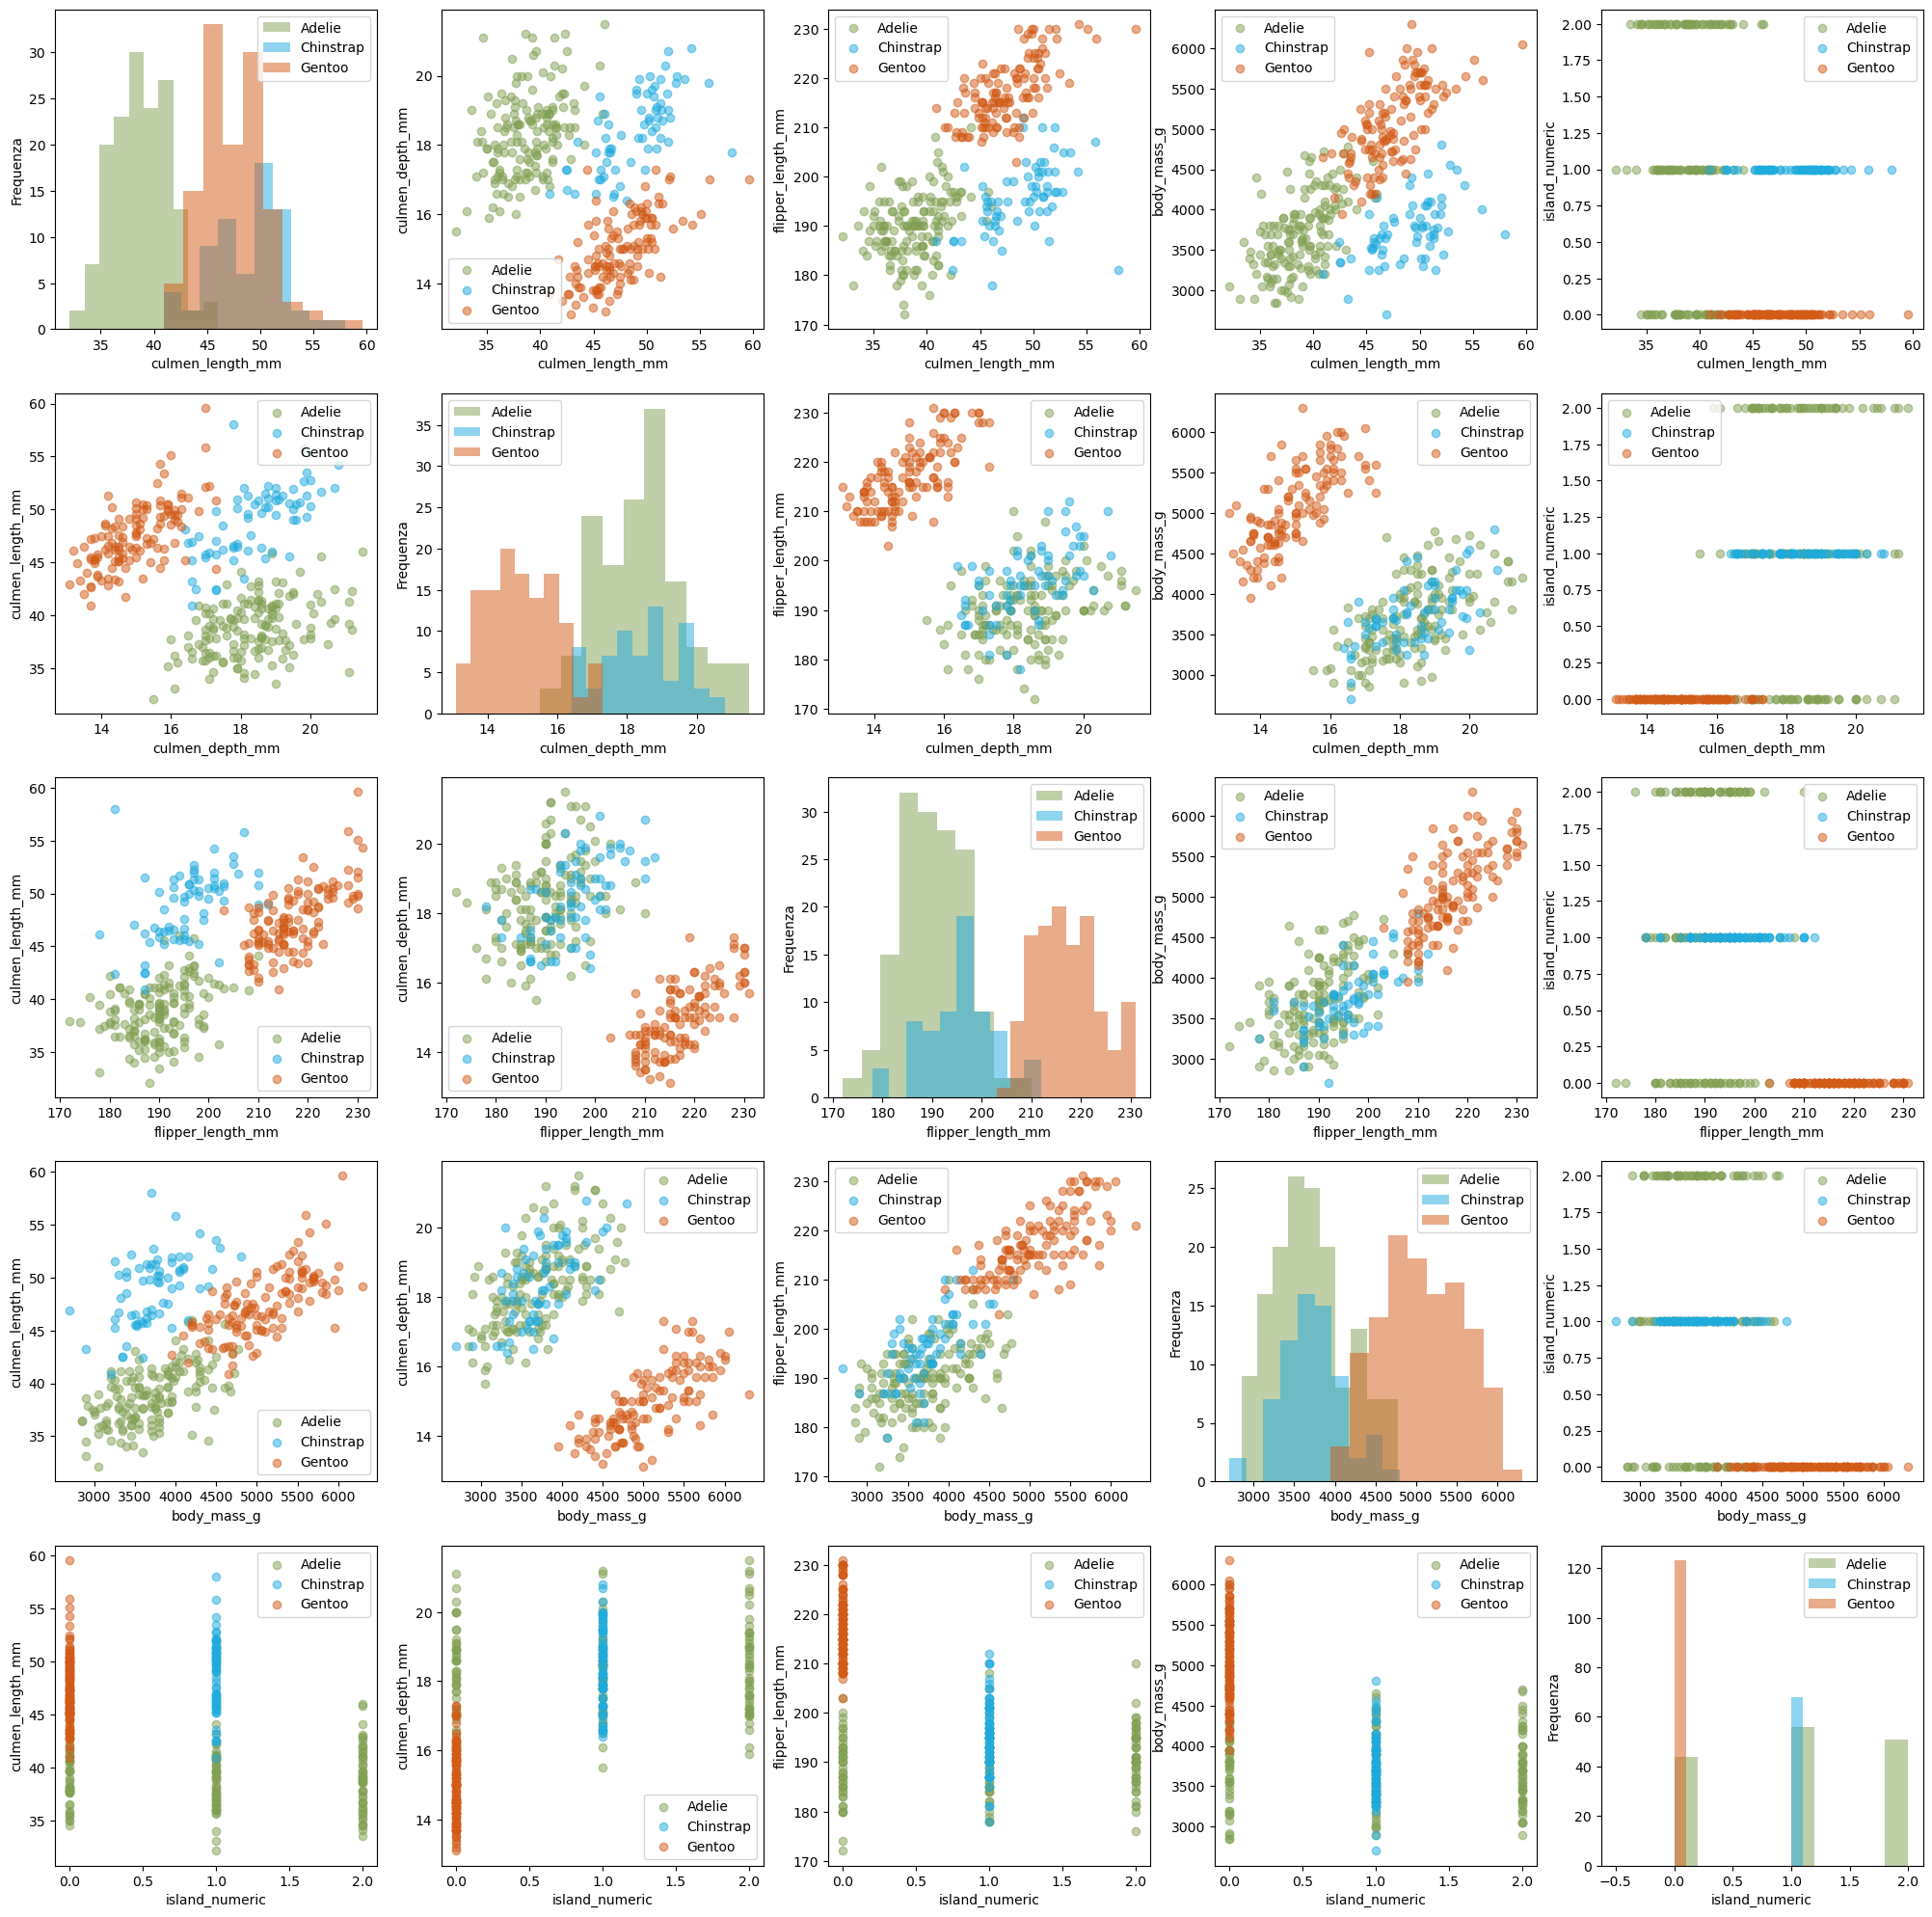

In [18]:
selected_cols=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g","island_numeric" ]#colonne di interesse

analisi_grafica(nuovo_data, "species", selected_cols)

più gli istogrammi sono separati, più una feature è importante. se sono attaccati, una solo feature non basta. Non c'è una separazione netta. Per capire se due bastano, trovare due grafici dove gli istogrammi sono separati, Se non c'è mai una separazione netta, la rete deve usare almeno 3